# FlyPrice: Analyzing and Forecasting Flight Fares

In [2]:
import numpy as np 

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

import warnings

from sklearn.model_selection import train_test_split

import os

plt.style.use('ggplot')



warnings.filterwarnings('ignore')


## Read CSV file

In [3]:
df = pd.read_csv("/Users/rahulmaddula/Downloads/Clean_Dataset.csv")

In [4]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [5]:

df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
df.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
297925,297925,Air_India,AI-430,Chennai,Morning,one,Morning,Kolkata,Business,23.08,46,55377
71127,71127,Air_India,AI-687,Mumbai,Afternoon,one,Morning,Hyderabad,Economy,19.92,8,7584
18,18,AirAsia,I5-747,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
51987,51987,GO_FIRST,G8-520,Mumbai,Night,one,Morning,Delhi,Economy,11.08,45,7471
33325,33325,AirAsia,I5-829,Delhi,Night,one,Early_Morning,Hyderabad,Economy,9.75,36,2050
127655,127655,Indigo,6E-282,Kolkata,Afternoon,two_or_more,Evening,Mumbai,Economy,6.83,2,20979
48225,48225,Indigo,6E-6182,Mumbai,Early_Morning,one,Evening,Delhi,Economy,9.42,28,2339
161248,161248,Vistara,UK-880,Hyderabad,Afternoon,one,Night,Mumbai,Economy,6.67,21,5060
91300,91300,GO_FIRST,G8-241,Bangalore,Evening,one,Late_Night,Delhi,Economy,7.75,37,3466
180191,180191,AirAsia,I5-974,Hyderabad,Night,one,Morning,Chennai,Economy,10.25,46,1776


## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
# Conversion rate from INR to USD
conversion_rate = 83.0

# Create a copy of the original df to work with
final_df = df.copy()

# Convert the price column from INR to USD
final_df['price'] = final_df['price'] / conversion_rate

# Round the price to 2 decimal places
final_df['price'] = final_df['price'].round(2)

# Display the updated final_df
final_df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.72
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.72
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.76
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.75
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.75


In [9]:
# Drop the 'Unnamed: 0' column from final_df
final_df.drop('Unnamed: 0', axis=1, inplace=True)

# Display the updated final_df
final_df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.72
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.72
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.76
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.75
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.75


In [10]:
# Save DataFrame as CSV
final_df.to_csv('final_data.csv', index=False)


In [11]:
final_df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,251.682598
std,7.191997,13.561004,273.467062
min,0.830000,1.000000,13.310000
25%,6.830000,15.000000,57.630000
50%,11.250000,26.000000,89.460000
75%,16.170000,38.000000,512.300000
max,49.830000,49.000000,1482.780000


In [12]:
# Display data types of the columns
print(final_df.dtypes)


airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object


In [13]:
final_df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
final_df.duplicated().sum()

0

## EDA

<Axes: >

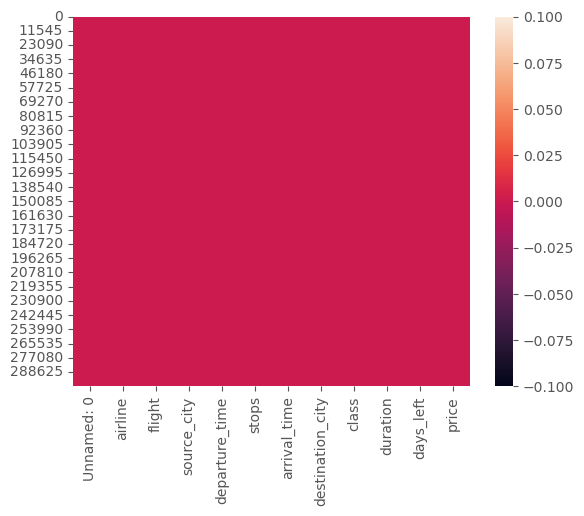

In [13]:
sns.heatmap(df.isnull())



#### The heatmap visualization shows that the dataset is clean, with no missing values or duplicate entries across any of the columns, ensuring the data is ready for analysis without requiring additional data cleaning

In [14]:
final_df.shape

(300153, 11)

In [15]:
final_df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

#### The nunique() function indicates the number of unique values in each column of final_df

In [16]:
final_df['price'].describe()

count    300153.000000
mean        251.682598
std         273.467062
min          13.310000
25%          57.630000
50%          89.460000
75%         512.300000
max        1482.780000
Name: price, dtype: float64

#### The describe() function provides a summary of the price distribution in final_df.
#### This shows that while the majority of tickets are under $512, there is a significant variation in ticket prices, with some tickets priced much higher than others.

<Axes: xlabel='price', ylabel='Count'>

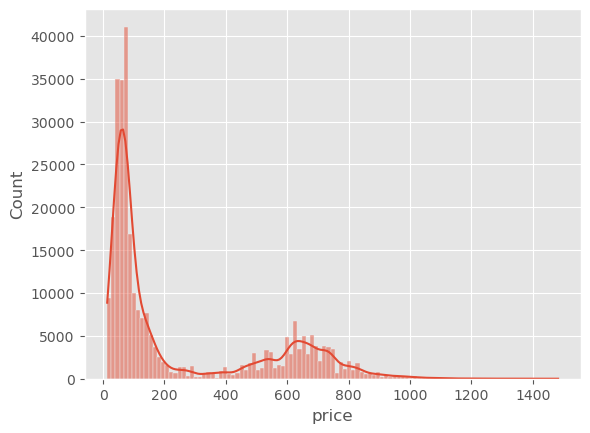

In [17]:
sns.histplot(data=final_df['price'] ,kde=True)

#### Our target variable has a right skewness.
#### Most of our price values in a range of 10 - 500.& we can predict that these values coantains alot of Economy class ,little of Businesss class.

In [18]:
final_df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

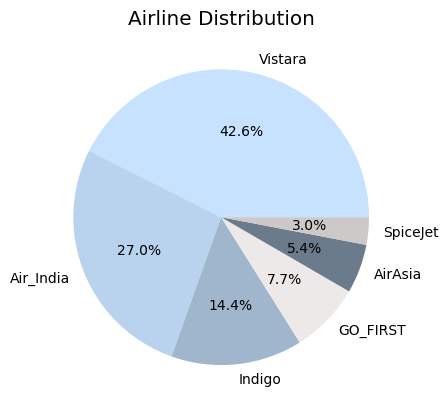

In [19]:
plt.title('Airline Distribution')

airline_counts = final_df['airline'].value_counts()

plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', colors = ["#C6E2FF","#B9D3EE" ,"#9FB6CD","#EEE9E9","#6C7B8B","#CDC9C9"])

plt.show()

#### Vistara is the leading airline in the dataset, with the highest frequency of 127,859 bookings.

In [20]:
final_df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}, ylabel='count'>

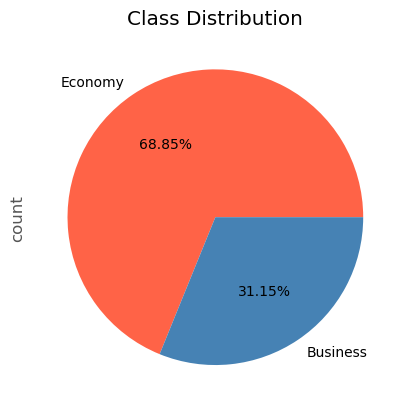

In [21]:
plt.title('Class Distribution')

round(df['class'].value_counts()/final_df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", colors=["#FF6347", "#4682B4"])

#### The code generates a pie chart showing the percentage distribution of flight classes in the dataset, with Economy class comprising 68.8% and Business class 31.2%.

In [22]:
final_df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

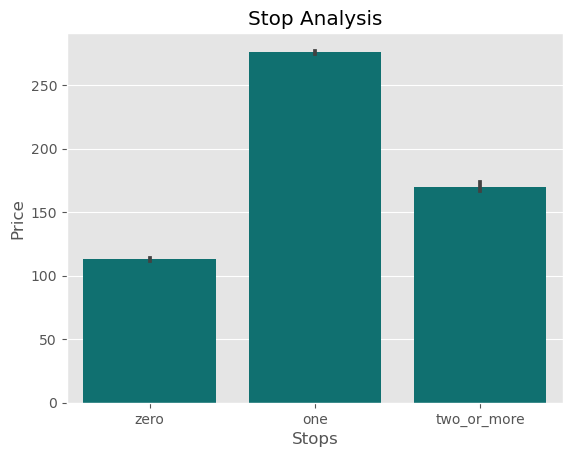

In [23]:
sns.barplot(data=final_df, x="stops", y="price", color='#008080')
plt.title('Stop Analysis')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()


#### Most flights (84.5%) have one stop, while 12.1% are non-stop and 4.4% have two or more stops.
#### Shows that flights with one stop are the most expensive, followed by those with two or more stops, while non-stop flights have the lowest average price.

In [24]:
final_df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [16]:
import plotly.express as px

# Create a bar plot for source cities using final_df
fig = px.bar(final_df['source_city'].value_counts(), 
             x=final_df['source_city'].value_counts().index, 
             y=final_df['source_city'].value_counts().values)

# Update the layout for the axes and add a title
fig.update_layout(title="Source City Analysis", xaxis_title="Source City", yaxis_title="Count")

# Show the plot
fig.show()


# Business Questions Answered through EDA

## How does the ticket price vary between Economy and Business class?

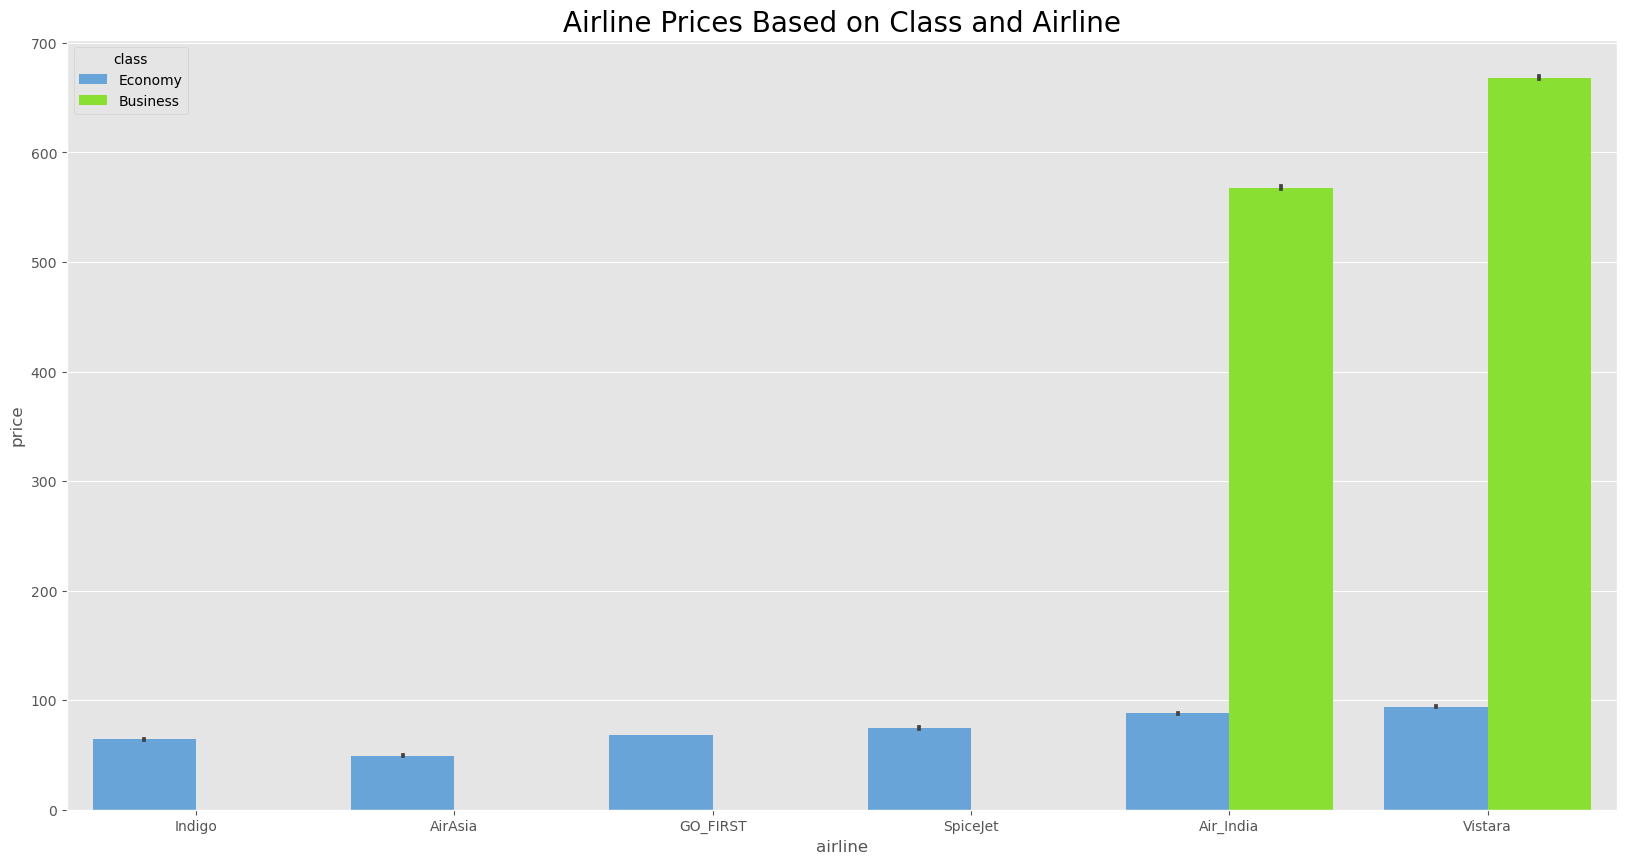

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Custom color palette
custom_palette = ["#56A5EC", "#8AFB17", "#3357FF"]

# Create the bar plot
sns.barplot(x='airline', y='price', hue="class", data=final_df.sort_values("price"), palette=custom_palette) \
    .set_title('Airline Prices Based on Class and Airline', fontsize=20)

# Show the plot
plt.show()


## Does price vary with Airlines?

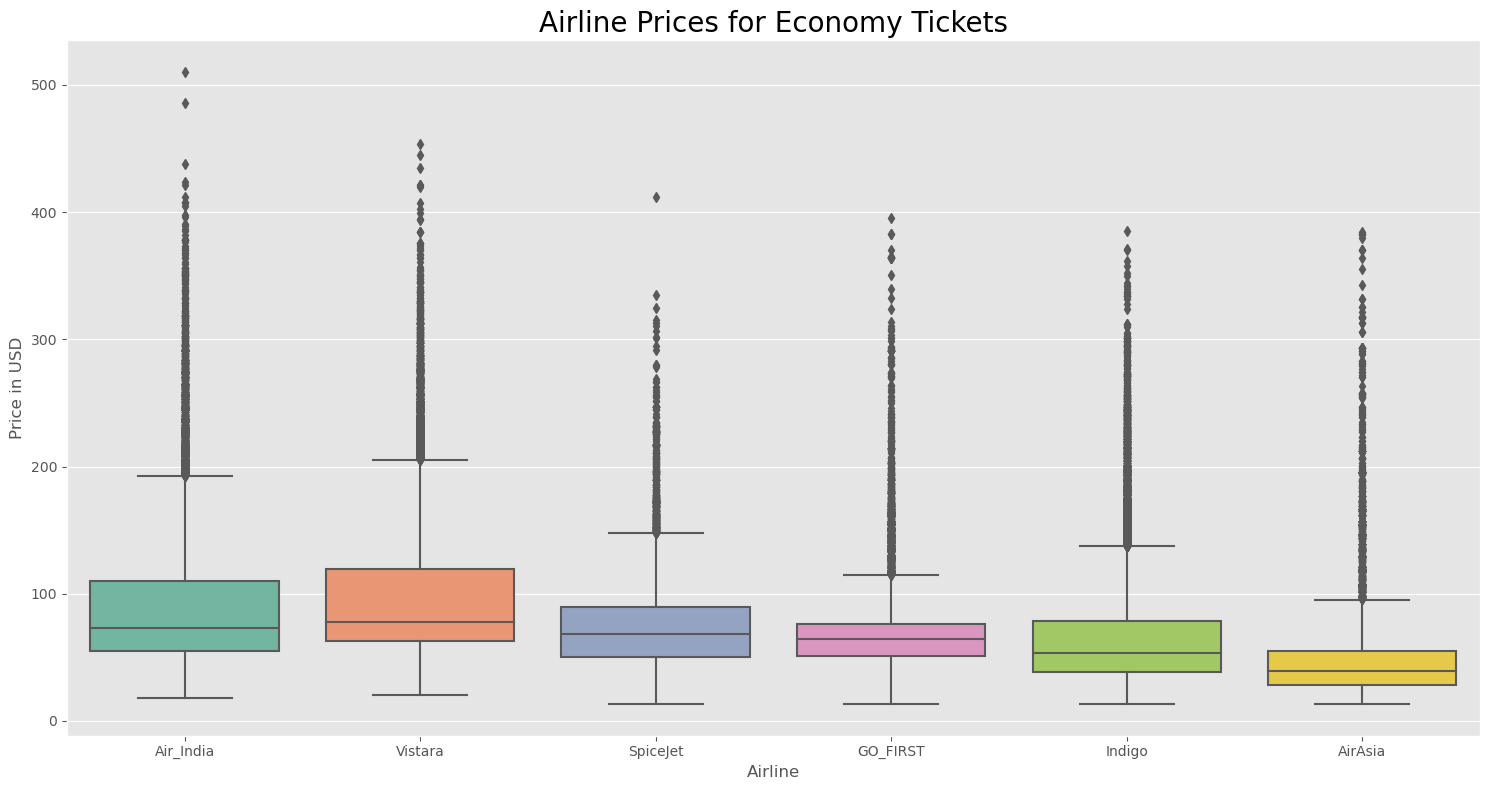

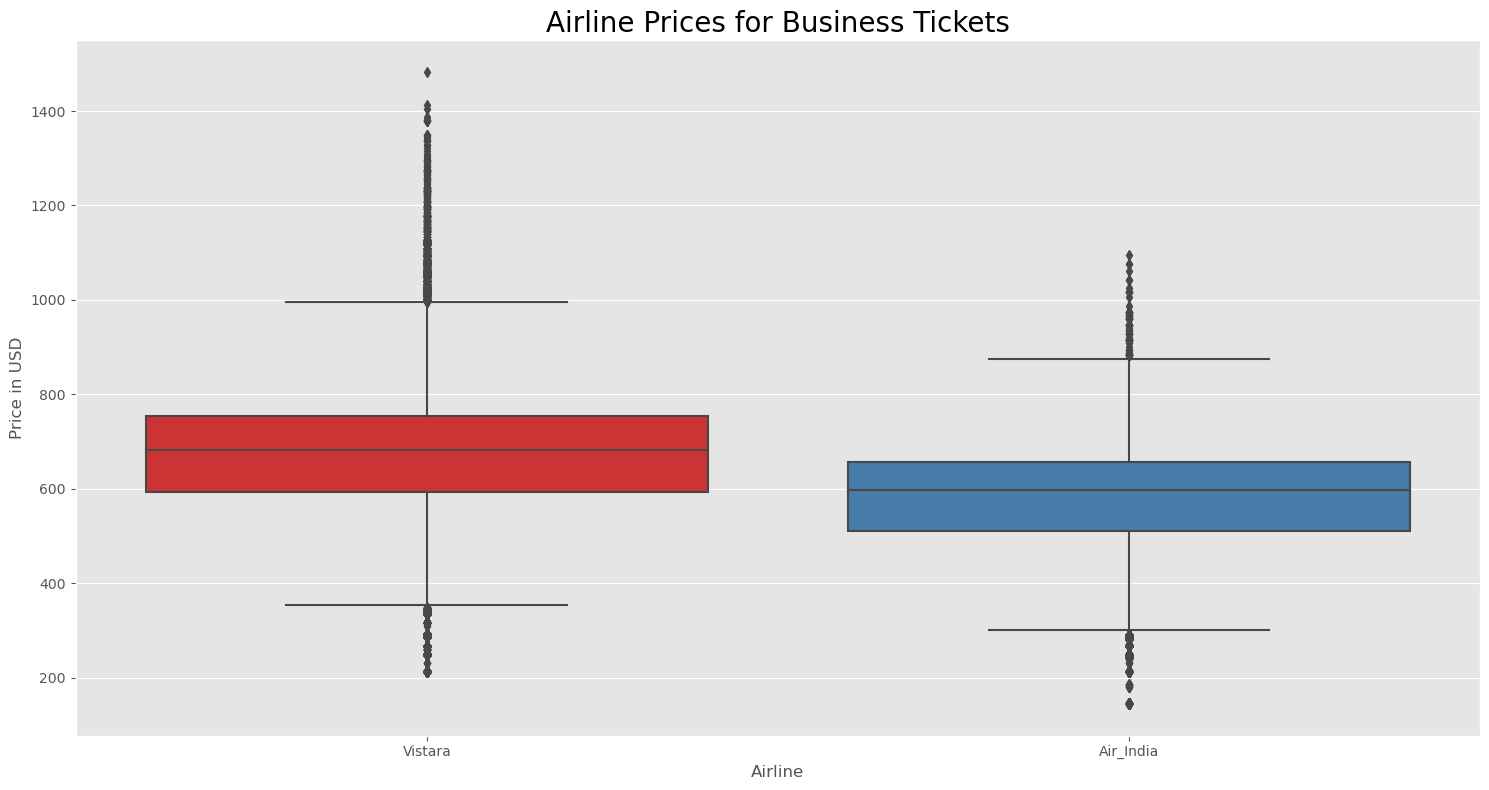

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for Economy class prices
plt.figure(figsize=(15, 8))  # Set the figure size
sns.boxplot(y="price", x="airline", data=final_df.loc[final_df["class"] == 'Economy'].sort_values("price", ascending=False),
             palette="Set2")
plt.title("Airline Prices for Economy Tickets", fontsize=20)
plt.ylabel("Price in USD")
plt.xlabel("Airline")

# Save the figure as an image
plt.tight_layout()
plt.savefig('economy_class_prices.png')
plt.show()



import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for Business class prices
plt.figure(figsize=(15, 8))  # Set the figure size
sns.boxplot(y="price", x="airline", data=final_df.loc[final_df["class"] == 'Business'].sort_values("price", ascending=False),
             palette="Set1")
plt.title("Airline Prices for Business Tickets", fontsize=20)
plt.ylabel("Price in USD")
plt.xlabel("Airline")

# Save the figure as an image
plt.tight_layout()
plt.savefig('business_class_prices.png')
plt.show()


## What is Most popular Airline ?

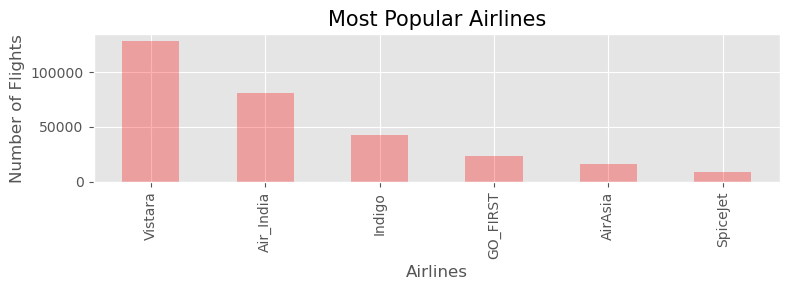

In [28]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 3))

# Plot the value counts of airlines
final_df['airline'].value_counts().plot(kind='bar', color='red', alpha=0.3)

# Set the title and labels
plt.title("Most Popular Airlines", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Number of Flights")

# Show the plot
plt.tight_layout()
plt.show()


## How is the price affected when tickets are bought before departure ?

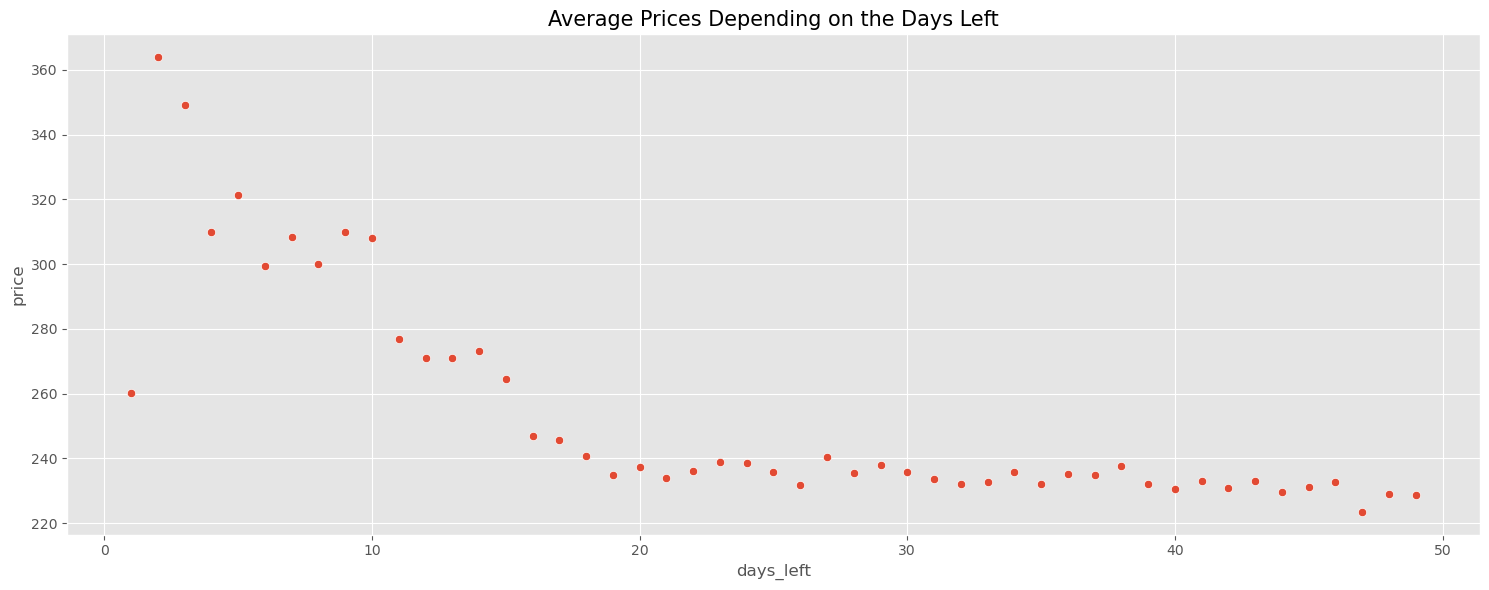

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'days_left' and calculate the mean price
grouped_df = final_df.groupby(['days_left'])['price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a scatter plot
ax = sns.scatterplot(x="days_left", y="price", data=grouped_df)

# Set the title
ax.set_title("Average Prices Depending on the Days Left", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


## Does ticket price change based on the departure time and arrival time?

<Figure size 1500x600 with 0 Axes>

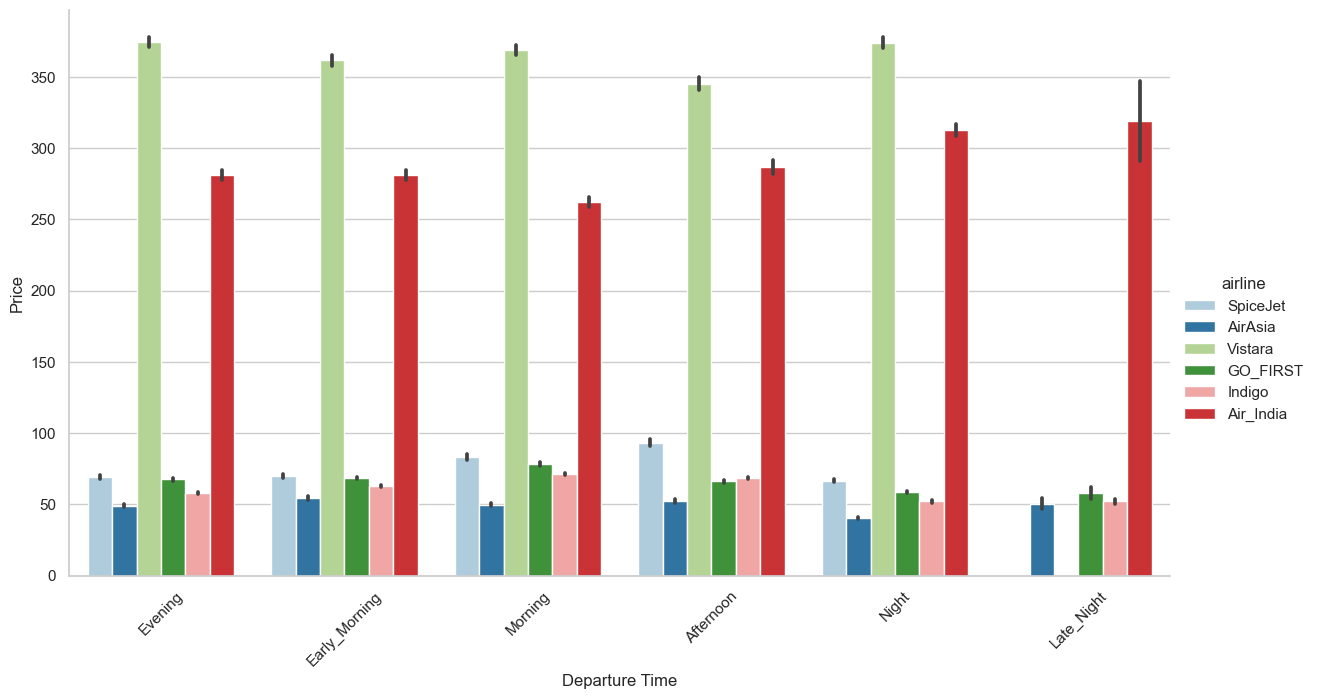

<Figure size 1500x600 with 0 Axes>

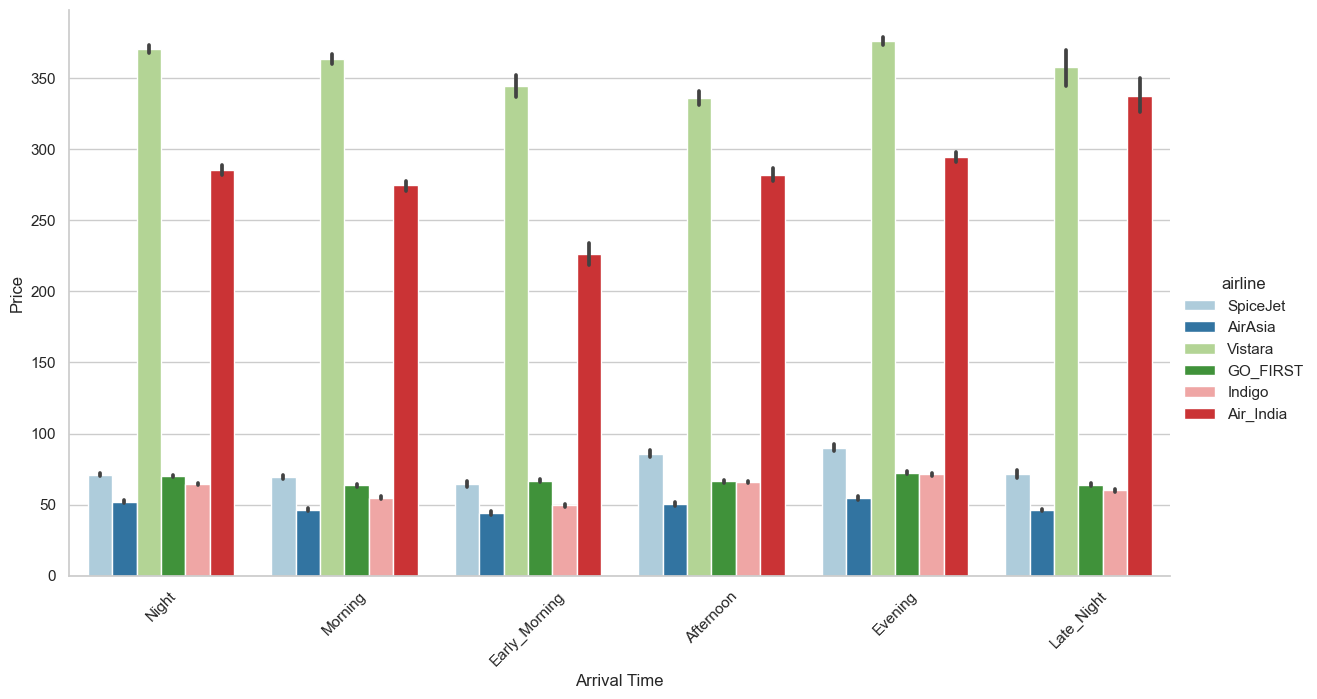

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for ticket price based on departure time
plt.figure(figsize=(15, 6))

# Bar plot for departure time
departure_plot = sns.catplot(data=final_df, kind="bar", x="departure_time", y="price", hue="airline",
                              height=6.5, aspect=12/6.5, palette='Paired')

departure_plot.set_titles('Ticket Price Based on Departure Time')
departure_plot.set_axis_labels('Departure Time', 'Price')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for ticket price based on arrival time
plt.figure(figsize=(15, 6))

# Bar plot for arrival time
arrival_plot = sns.catplot(data=final_df, kind="bar", x="arrival_time", y="price", hue="airline",
                           height=6.5, aspect=12/6.5, palette='Paired')

arrival_plot.set_titles('Ticket Price Based on Arrival Time')
arrival_plot.set_axis_labels('Arrival Time', 'Price')
plt.xticks(rotation=45)
plt.show()


## What is the most expensive flight between two cities?

In [31]:
# Grouping the data by source and destination cities and calculating the mean price
grouped_data_city = final_df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)

# Getting the most expensive flight
most_expensive_flight = grouped_data_city.head(10)

# Displaying the result
print(most_expensive_flight)


source_city  destination_city
Chennai      Bangalore           302.191191
Kolkata      Chennai             285.063968
Bangalore    Kolkata             283.132526
             Chennai             280.984902
Mumbai       Bangalore           278.890269
Bangalore    Mumbai              278.657578
Mumbai       Chennai             274.481092
Chennai      Mumbai              274.286901
Kolkata      Bangalore           274.032929
Chennai      Kolkata             273.131452
Name: price, dtype: float64


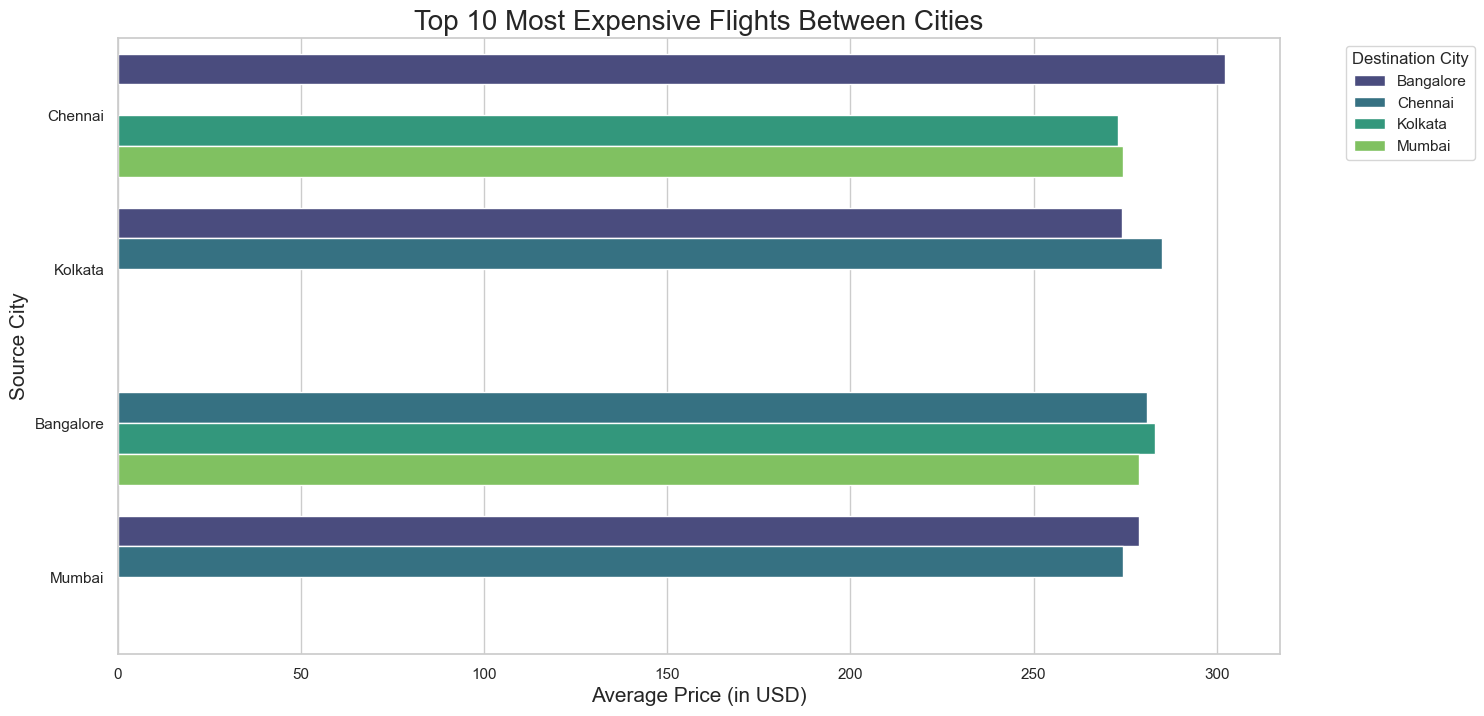

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data to find the average price between source and destination cities
grouped_data_city = final_df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Sort the values to get the most expensive flights
grouped_data_city = grouped_data_city.sort_values(by='price', ascending=False).head(10)  # Get top 10 most expensive

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data_city, x='price', y='source_city', hue='destination_city', palette='viridis')
plt.title('Top 10 Most Expensive Flights Between Cities', fontsize=20)
plt.xlabel('Average Price (in USD)', fontsize=15)
plt.ylabel('Source City', fontsize=15)
plt.legend(title='Destination City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


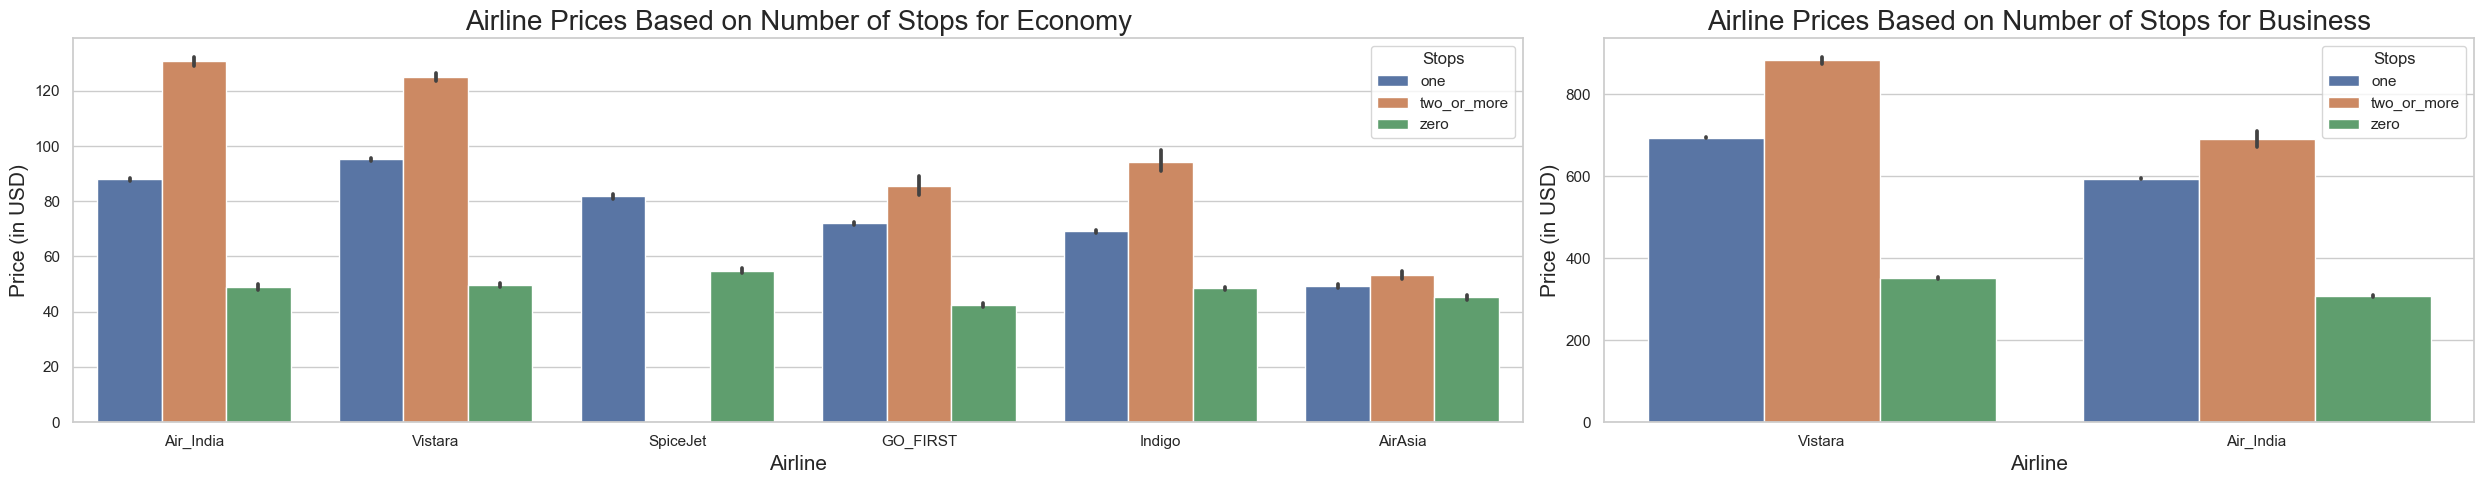

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for Economy and Business classes
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

# Bar plot for Economy class
sns.barplot(y="price", x="airline", hue="stops",
            data=final_df.loc[final_df["class"] == 'Economy'].sort_values("price", ascending=False), ax=axs[0])
axs[0].set_title("Airline Prices Based on Number of Stops for Economy", fontsize=20)
axs[0].set_xlabel("Airline", fontsize=15)
axs[0].set_ylabel("Price (in USD)", fontsize=15)

# Bar plot for Business class
sns.barplot(y="price", x="airline", hue="stops",
            data=final_df.loc[final_df["class"] == 'Business'].sort_values("price", ascending=False), ax=axs[1])
axs[1].set_title("Airline Prices Based on Number of Stops for Business", fontsize=20)
axs[1].set_xlabel("Airline", fontsize=15)
axs[1].set_ylabel("Price (in USD)", fontsize=15)

# Adjust the legend
axs[0].legend(title='Stops', loc='upper right')
axs[1].legend(title='Stops', loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


## Does the number of stops influences the price?

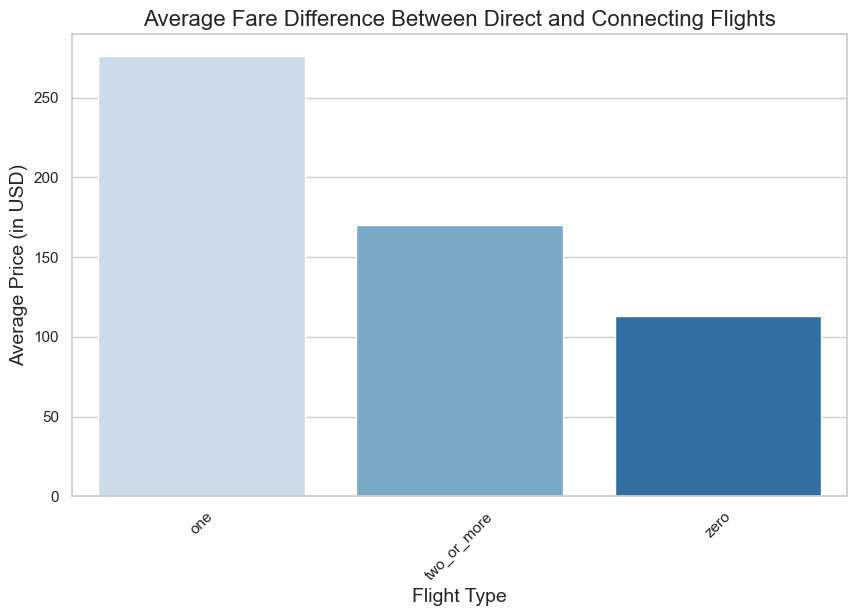

         stops       price
0          one  275.915521
1  two_or_more  170.041213
2         zero  112.963109


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df is already defined and contains the necessary data

# Group by the 'stops' column and calculate the average price for direct (0 stops) and connecting flights (1 or more stops)
average_fare_difference = final_df.groupby('stops')['price'].mean().reset_index()

# Rename the stops for better clarity
average_fare_difference['stops'] = average_fare_difference['stops'].replace({0: 'Direct', 1: '1 Stop', 2: '2 Stops'})

# Plotting the average fare difference
plt.figure(figsize=(10, 6))
sns.barplot(data=average_fare_difference, x='stops', y='price', palette='Blues')
plt.title('Average Fare Difference Between Direct and Connecting Flights', fontsize=16)
plt.xlabel('Flight Type', fontsize=14)
plt.ylabel('Average Price (in USD)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Display the average fare difference data
print(average_fare_difference)
